In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

url = 'C:\\Users\\Ruslan\\Desktop\\loan_data.xls'

loansDS = pd.read_excel(url) 

loansDS['Total_income'] = loansDS['ApplicantIncome'] + loansDS['CoapplicantIncome']

upper_bound_98 = loansDS['Total_income'].quantile(0.98)

print("Data set size : ")
print(loansDS.shape[0])

print('Missing information:')
print(loansDS.isnull().sum())

Data set size : 
614
Missing information:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64


In [112]:
print(loansDS.head(10).to_string())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Total_income
0  LP001002   Male      No          0      Graduate            No             5849                  0         NaN             360.0             1.0         Urban           Y          5849
1  LP001003   Male     Yes          1      Graduate            No             4583               1508       128.0             360.0             1.0         Rural           N          6091
2  LP001005   Male     Yes          0      Graduate           Yes             3000                  0        66.0             360.0             1.0         Urban           Y          3000
3  LP001006   Male     Yes          0  Not Graduate            No             2583               2358       120.0             360.0             1.0         Urban           Y          4941
4  LP001008   Male      No          0      Graduate         

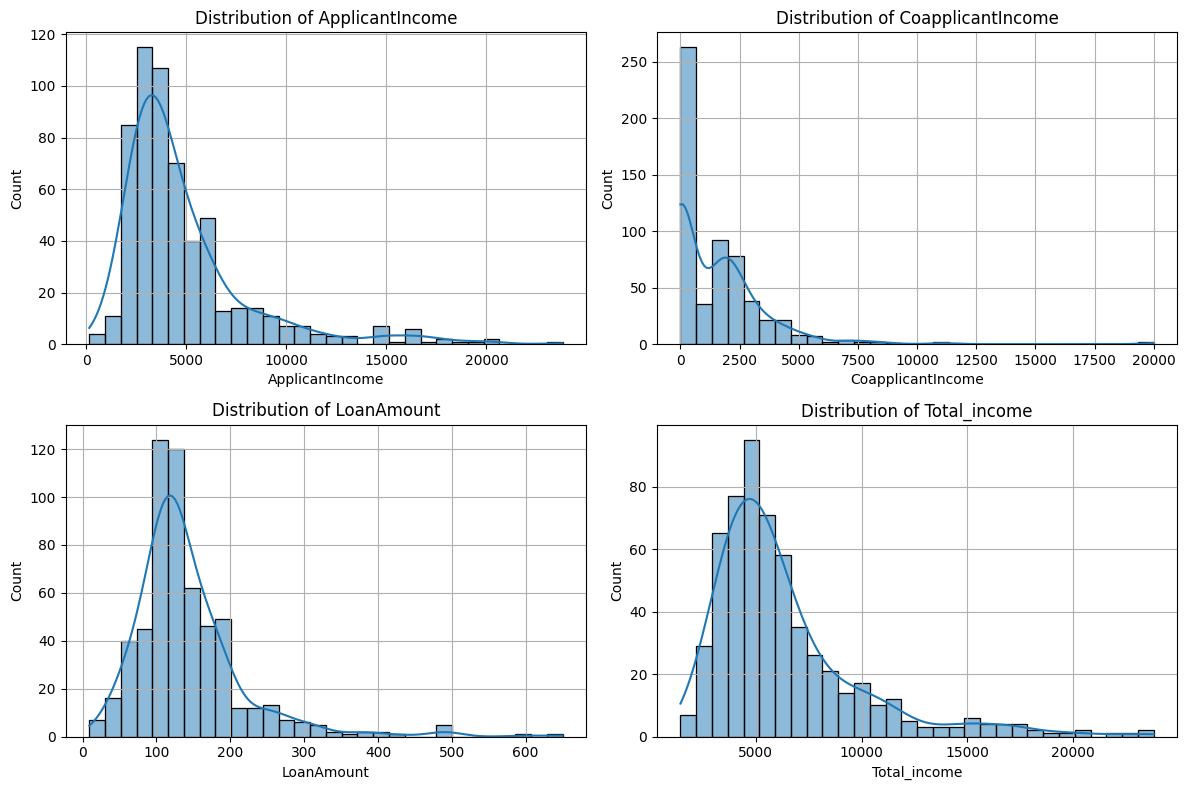

In [113]:
# Drop rows with too big Total_income
# Drop rows with NaN loan amount
# Fill NaN Credit_History with 0
cleaned_loansDS = loansDS.dropna(subset=['LoanAmount'])  \
                  .drop(loansDS[loansDS['Total_income'] > upper_bound_98].index)  \
                  .fillna({'Credit_History' : 0})  \
                  
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income']
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(cleaned_loansDS[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

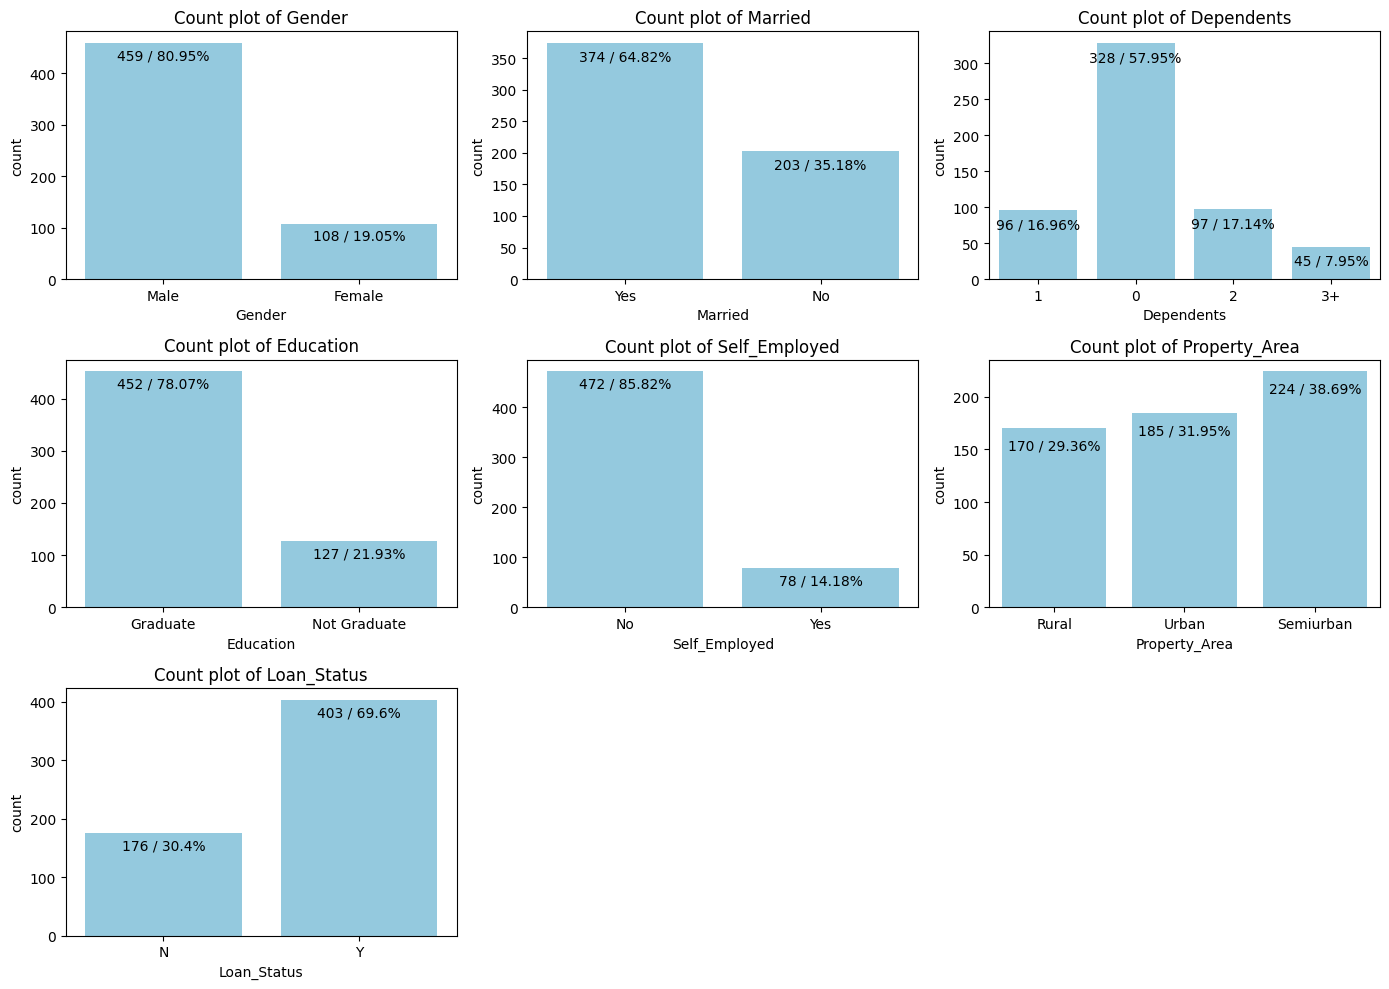

In [114]:
# Numeric counters


categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(14, 10))

for i, column in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(x=cleaned_loansDS[column], color="skyblue")
    plt.title(f'Count plot of {column}')
    total_height = 0
    for p in ax.patches:
        height = p.get_height()
        total_height = total_height + height
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height - 10,
                f'{height:.0f}' + ' / ' + f"{round(int(height)*100/total_height,2)}%", ha="center", va="top")

plt.tight_layout()
plt.show()

                    Gender   Married  Dependents  Education  Self_Employed  \
Gender            1.000000 -0.364932   -0.203142   0.054017       0.001490   
Married          -0.364932  1.000000    0.359280  -0.014726       0.002040   
Dependents       -0.203142  0.359280    1.000000  -0.053971       0.061084   
Education         0.054017 -0.014726   -0.053971   1.000000       0.002013   
Self_Employed     0.001490  0.002040    0.061084   0.002013       1.000000   
LoanAmount       -0.110005  0.139413    0.136245   0.167461       0.161339   
Loan_Amount_Term  0.087856 -0.099736   -0.075749   0.077480      -0.048713   
Credit_History   -0.021607 -0.023772    0.003652   0.084875      -0.003392   
Property_Area     0.104869  0.016136    0.010079   0.060316      -0.023286   
Loan_Status      -0.023767  0.087336    0.021702   0.076181      -0.011666   
Total_income     -0.128142  0.106928    0.101151   0.188340       0.240901   

                  LoanAmount  Loan_Amount_Term  Credit_History 

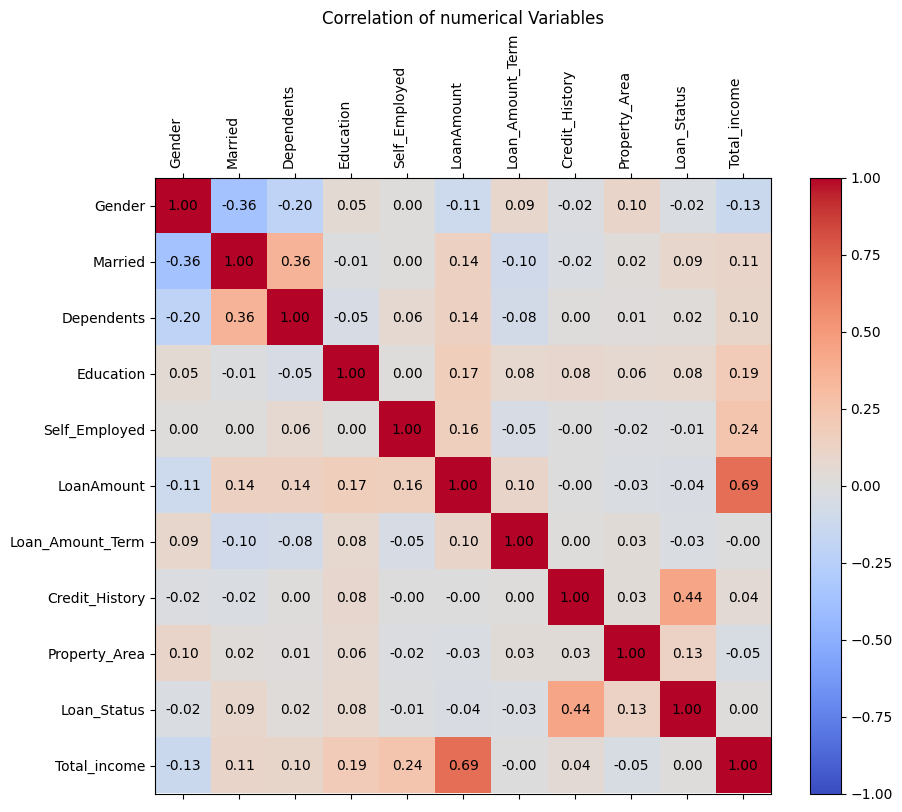

In [118]:
cleaned_loans_binarised = cleaned_loansDS
cleaned_loans_binarised['Gender'] = cleaned_loans_binarised['Gender'].map({'Male': 0, 'Female': 1})
cleaned_loans_binarised['Married'] = cleaned_loans_binarised['Married'].map({'No': 0, 'Yes': 1})
cleaned_loans_binarised["Education"]=cleaned_loans_binarised["Education"].map({'Not Graduate': 0, 'Graduate': 1})
cleaned_loans_binarised["Self_Employed"]=cleaned_loans_binarised["Self_Employed"].map({'No': 0, 'Yes': 1})
cleaned_loans_binarised["Loan_Status"]=cleaned_loans_binarised["Loan_Status"].map({'N': 0, 'Y': 1})
cleaned_loans_binarised['Property_Area'] = cleaned_loans_binarised['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})
cleaned_loans_binarised['Dependents'] = cleaned_loans_binarised['Dependents'].map({0 :0, 1: 1, 2: 2, '3+': 3})
numerical_columns = cleaned_loans_binarised.select_dtypes(include=['number']).columns.tolist()
# Spalten, die du entfernen möchtest
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome']

# Entferne diese Spalten aus der Liste
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]
correlation_matrix=cleaned_loans_binarised[numerical_columns].corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

# Definieren der Farbskala
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Erstellen der Heatmap
cax = ax.matshow(correlation_matrix, cmap=cmap, norm=norm)

# Hinzufügen von Farbskala
fig.colorbar(cax)

# Beschriftungen der Achsen
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns)
ax.set_yticklabels(numerical_columns)

# Add values to each cell
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(rotation=90, ha='right')


# Hinzufügen von Titeln und Labels
plt.title('Correlation of numerical Variables')
print(cleaned_loansDS)

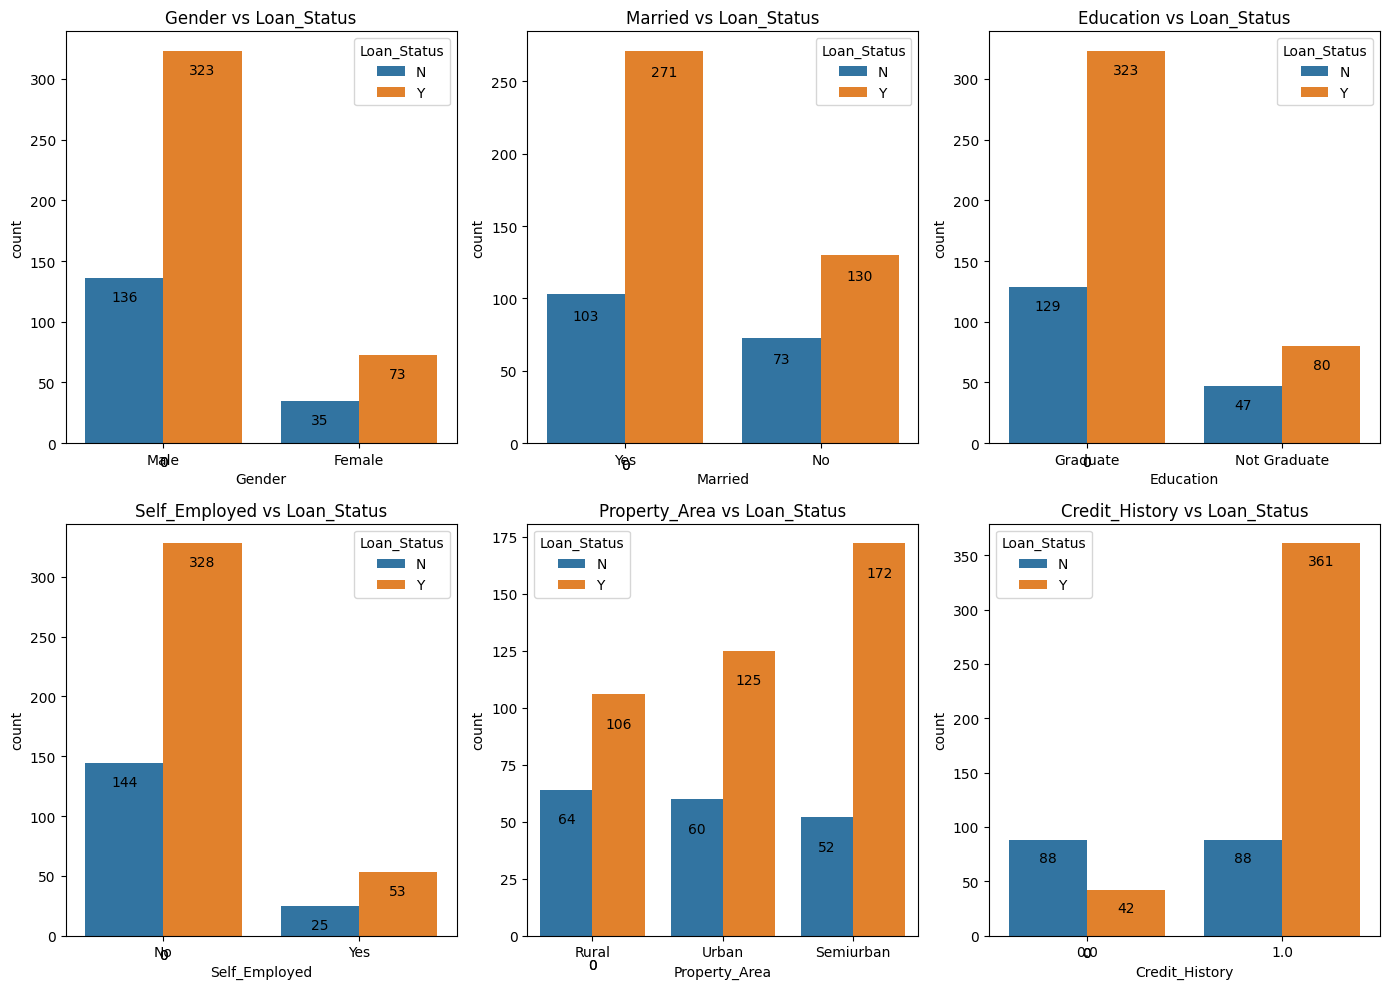

In [115]:
fairness_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
plt.figure(figsize=(14, 10))

for i, column in enumerate(fairness_features):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(x=column, hue='Loan_Status', data=cleaned_loansDS)
    plt.title(f'{column} vs Loan_Status')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height - 10,
                f'{height:.0f}', ha="center", va="top")

plt.tight_layout()
plt.show()

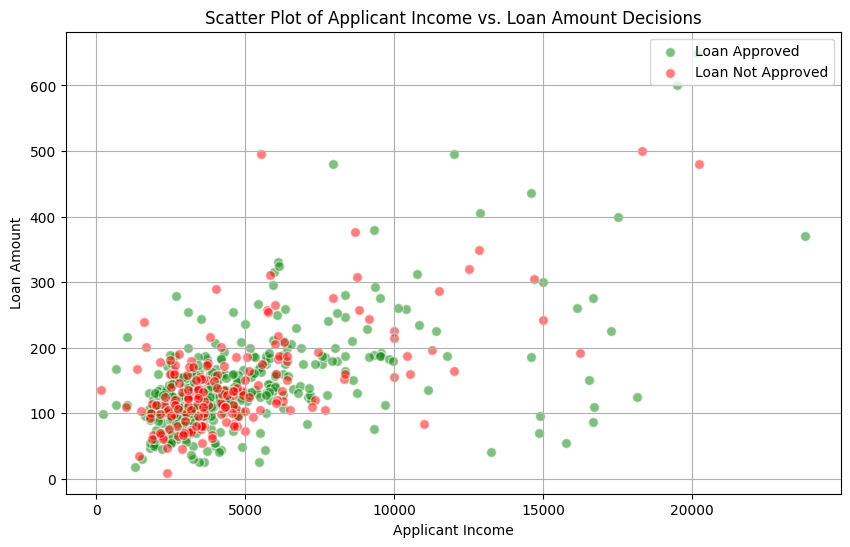

In [116]:
plt.figure(figsize=(10, 6))

# Plotting the data points where Loan_Status is 'Y' (Loan Approved)
plt.scatter(
    cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'Y']['ApplicantIncome'], 
    cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'Y']['LoanAmount'], 
    alpha=0.5, c='green', edgecolors='w', s=50, label='Loan Approved'
)

# Plotting the data points where Loan_Status is 'N' (Loan Not Approved)
plt.scatter(
    cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'N']['ApplicantIncome'], 
    cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'N']['LoanAmount'], 
    alpha=0.5, c='red', edgecolors='w', s=50, label='Loan Not Approved'
)

# Adding the title and labels
plt.title('Scatter Plot of Applicant Income vs. Loan Amount Decisions')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

# Adding the grid
plt.grid(True)

# Adding the legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


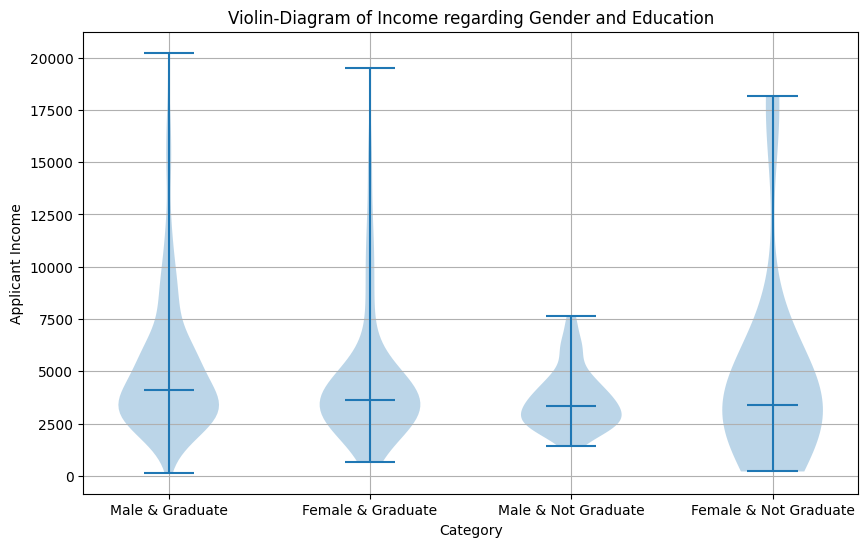

In [117]:
income_male_grad = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Male') & (cleaned_loansDS['Education'] == 'Graduate')]['ApplicantIncome']
income_female_grad = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Female') & (cleaned_loansDS['Education'] == 'Graduate')]['ApplicantIncome']
income_male_nograd = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Male') & (cleaned_loansDS['Education'] == 'Not Graduate')]['ApplicantIncome']
income_female_nograd = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Female') & (cleaned_loansDS['Education'] == 'Not Graduate')]['ApplicantIncome']
plt.figure(figsize=(10, 6))
plt.violinplot([income_male_grad, income_female_grad, income_male_nograd, income_female_nograd], showmeans=False, showmedians=True)
plt.xticks([1, 2, 3, 4], ['Male & Graduate', 'Female & Graduate', 'Male & Not Graduate', 'Female & Not Graduate'])
plt.title('Violin-Diagram of Income regarding Gender and Education')
plt.xlabel('Category')
plt.ylabel('Applicant Income')
plt.grid(True)
plt.show()

In [119]:
cleaned_loans_binarised_male = cleaned_loans_binarised[cleaned_loans_binarised['Gender'] == 0]
cleaned_loans_binarised_female = cleaned_loans_binarised[cleaned_loans_binarised['Gender'] == 1]

x = cleaned_loans_binarised[['Gender','Property_Area','Married','Dependents','Education','Self_Employed','Total_income' ,'LoanAmount', 'Credit_History', 'Loan_Amount_Term']]
y = cleaned_loans_binarised['Loan_Status']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size = 0.3, random_state = 0)


# Separate the test set and predictions by gender
X_test_male = X_test[X_test['Gender'] == 0]
X_test_female = X_test[X_test['Gender'] == 1]

y_test_male = y_test[X_test['Gender'] == 0]
y_test_female = y_test[X_test['Gender'] == 1]

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import numpy as np

# Dictionary to return yes/no 
lookup_loan_status = {1 : 'yes', 0 : 'no'}

# Define the model
rf_classifier = RandomForestClassifier(random_state=0)

# Define the hyperparameters and their ranges for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],         # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],          # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                         # Method of selecting samples for training each tree
}

# Perform Randomized Search with Cross-Validation
rf_random_search = RandomizedSearchCV(estimator=rf_classifier,
                                      param_distributions=param_dist,
                                      n_iter=100,           # Number of parameter settings that are sampled
                                      cv=3,                # Number of cross-validation folds
                                      verbose=2,           # Print the progress of the search
                                      random_state=42,     # Fixing the random state
                                      n_jobs=-1)           # Use all available cores

# Fit the model with Randomized Search
rf_random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
best_params = rf_random_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
best_rf_classifier = rf_random_search.best_estimator_
accuracy = best_rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print("MALES")
y_pred = best_rf_classifier.predict(X_test_male)
print("Confusion Matrix:\n", confusion_matrix(y_test_male, y_pred))
print("Classification Report:\n", classification_report(y_test_male, y_pred))
print("Precision Score:", precision_score(y_test_male, y_pred))
print("FEMALES")
y_pred = best_rf_classifier.predict(X_test_female)
print("Confusion Matrix:\n", confusion_matrix(y_test_female, y_pred))
print("Classification Report:\n", classification_report(y_test_female, y_pred))
print("Precision Score:", precision_score(y_test_female, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Accuracy: 0.7816091954022989
MALES
Confusion Matrix:
 [[20 18]
 [ 7 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.84      0.93      0.88       100

    accuracy                           0.82       138
   macro avg       0.79      0.73      0.75       138
weighted avg       0.81      0.82      0.81       138

Precision Score: 0.8378378378378378
FEMALES
Confusion Matrix:
 [[ 5  9]
 [ 2 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.61      0.88      0.72        16

    accuracy                           0.63        30
   macro avg       0.66      0.62  